# Introduction to Pandas

In [13]:
# importing pandas package with alias pd
import pandas as pd

In [14]:
#create a data frame - dictionary is used here where keys get converted to column names and values to row values.
data = pd.DataFrame({'Country': ['Russia','Colombia','Chile','Equador','Nigeria'],
                    'Rank':[121,40,100,130,11]})
data

Country  Rank
0    Russia   121
1  Colombia    40
2     Chile   100
3   Equador   130
4   Nigeria    11

In [15]:
# describe() method computes summary statistics of integer / double variables
data.describe()

Rank
count    5.000000
mean    80.400000
std     52.300096
min     11.000000
25%     40.000000
50%    100.000000
75%    121.000000
max    130.000000

In [16]:
# info() gives a more detailed statistics about data in dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
Country    5 non-null object
Rank       5 non-null int64
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


In [17]:
data = pd.DataFrame({'group':['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],'ounces':[4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
# head(n) gives first n rows of dataframe
data.head(5)

group  ounces
0     a     4.0
1     a     3.0
2     a    12.0
3     b     6.0
4     b     7.5

In [18]:
#Let's sort the data frame by ounces - inplace = True will make changes to the data
data.sort_values(by=['ounces'],ascending=True,inplace=False)

group  ounces
1     a     3.0
6     c     3.0
0     a     4.0
7     c     5.0
3     b     6.0
8     c     6.0
4     b     7.5
5     b     8.0
2     a    12.0

In [19]:
# Sorting on multiple columns
data.sort_values(by=['group','ounces'],ascending=[True,False],inplace=False)

group  ounces
2     a    12.0
0     a     4.0
1     a     3.0
5     b     8.0
4     b     7.5
3     b     6.0
8     c     6.0
7     c     5.0
6     c     3.0

Often, we get data sets with duplicate rows, which is nothing but noise. Therefore, before training the model, we need to make sure we get rid of such inconsistencies in the data set. Let's see how we can remove duplicate rows.

In [20]:
data = pd.DataFrame({'k1':['one']*3 + ['two']*4, 'k2':[3,2,1,3,3,4,4]})
data.sort_values(by='k2')

k1  k2
2  one   1
1  one   2
0  one   3
3  two   3
4  two   3
5  two   4
6  two   4

In [21]:
#remove duplicates 
data.drop_duplicates()

k1  k2
0  one   3
1  one   2
2  one   1
3  two   3
5  two   4

Here, we removed duplicates based on matching row values across all columns. Alternatively, we can also remove duplicates based on a particular column. Let's remove duplicate values from the k1 column

In [22]:
data.drop_duplicates(subset='k1')

k1  k2
0  one   3
3  two   3

Lets see how we can add a new column to our DataFrame

In [23]:
import numpy as np
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami','corned beef', 'Bacon', 'pastrami', 'honey ham','nova lox'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
# Creates a new column protien and assigns 9 random values to it
data = data.assign(protien = np.random.random(9))
data

food  ounces   protien
0        bacon     4.0  0.774148
1  pulled pork     3.0  0.622348
2        bacon    12.0  0.070620
3     Pastrami     6.0  0.282058
4  corned beef     7.5  0.980512
5        Bacon     8.0  0.549989
6     pastrami     3.0  0.107913
7    honey ham     5.0  0.882523
8     nova lox     6.0  0.161360

In [24]:
# Lets remove the added columns
data.drop('protien',axis='columns',inplace=True)
data

food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0

Lets see how we can use slice on DataFrames


In [25]:
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

A         B         C         D
2013-01-01  0.950417 -1.774676  1.281626  0.353016
2013-01-02  0.694667 -0.423630  0.524551 -1.035386
2013-01-03  1.388260  0.560598 -0.053798  0.366868
2013-01-04 -0.025555  0.111900  2.835645  0.136539
2013-01-05  0.510050 -0.699241  0.510259  0.799741
2013-01-06  0.270231 -0.197754 -0.911749  0.460378

In [26]:
#get first n rows from the data frame
df[:3]

A         B         C         D
2013-01-01  0.950417 -1.774676  1.281626  0.353016
2013-01-02  0.694667 -0.423630  0.524551 -1.035386
2013-01-03  1.388260  0.560598 -0.053798  0.366868

In [27]:
#slice based on date range
df['20130101':'20130104']

A         B         C         D
2013-01-01  0.950417 -1.774676  1.281626  0.353016
2013-01-02  0.694667 -0.423630  0.524551 -1.035386
2013-01-03  1.388260  0.560598 -0.053798  0.366868
2013-01-04 -0.025555  0.111900  2.835645  0.136539

In [28]:
#slicing based on column names
df.loc[:,['A','B']]

A         B
2013-01-01  0.950417 -1.774676
2013-01-02  0.694667 -0.423630
2013-01-03  1.388260  0.560598
2013-01-04 -0.025555  0.111900
2013-01-05  0.510050 -0.699241
2013-01-06  0.270231 -0.197754

In [29]:
df.loc['20130102':'20130103',['A','B']]

A         B
2013-01-02  0.694667 -0.423630
2013-01-03  1.388260  0.560598

In [30]:
#slicing based on index of columns
df.iloc[3] #returns 4th row (index is 3rd)

A   -0.025555
B    0.111900
C    2.835645
D    0.136539
Name: 2013-01-04 00:00:00, dtype: float64

In [31]:
#returns a specific range of rows
df.iloc[2:4, 0:2] # Selects rows from 2:4 and columns from 0:2

A         B
2013-01-03  1.388260  0.560598
2013-01-04 -0.025555  0.111900

In [32]:
# Comapring
df['B'] > 1

2013-01-01    False
2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-05    False
2013-01-06    False
Freq: D, Name: B, dtype: bool

In [33]:
# Boolean indexing based on column values as well. This helps in filtering a data set based on a pre-defined condition
df[df['B'] > 1]

Empty DataFrame
Columns: [A, B, C, D]
Index: []

We can also use a query method to select columns based on a criterion

In [34]:
#list all columns where A is greater than C
df.query('A > C')

A         B         C         D
2013-01-02  0.694667 -0.423630  0.524551 -1.035386
2013-01-03  1.388260  0.560598 -0.053798  0.366868
2013-01-06  0.270231 -0.197754 -0.911749  0.460378

In [35]:
#using OR condition
df.query('A < B | C > A')

A         B         C         D
2013-01-01  0.950417 -1.774676  1.281626  0.353016
2013-01-04 -0.025555  0.111900  2.835645  0.136539
2013-01-05  0.510050 -0.699241  0.510259  0.799741

# Exploring the Iris dataset

In [36]:
# Reading the csv file using pandas into a DataFrame
iris = pd.read_csv('Iris.csv')
iris.head(10)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa

In [37]:
iris.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [38]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [39]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

## Data Visualization

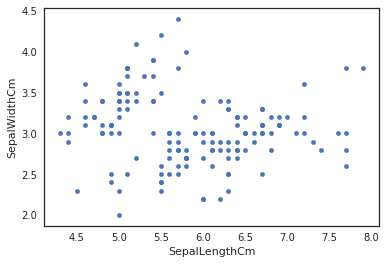

In [40]:
# We can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
%matplotlib inline
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

In [41]:
# Importing some visualization libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set(style="white", color_codes=True)

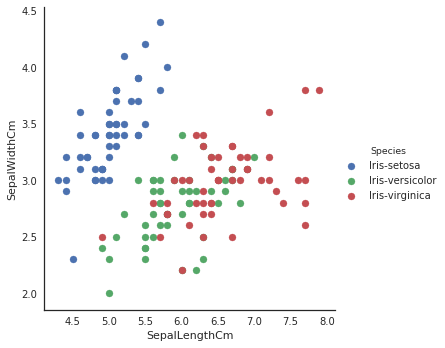

In [42]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

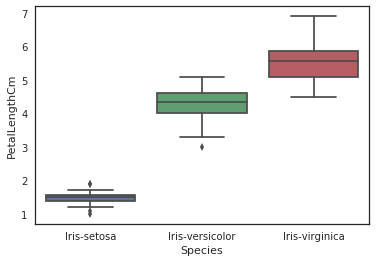

In [43]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)


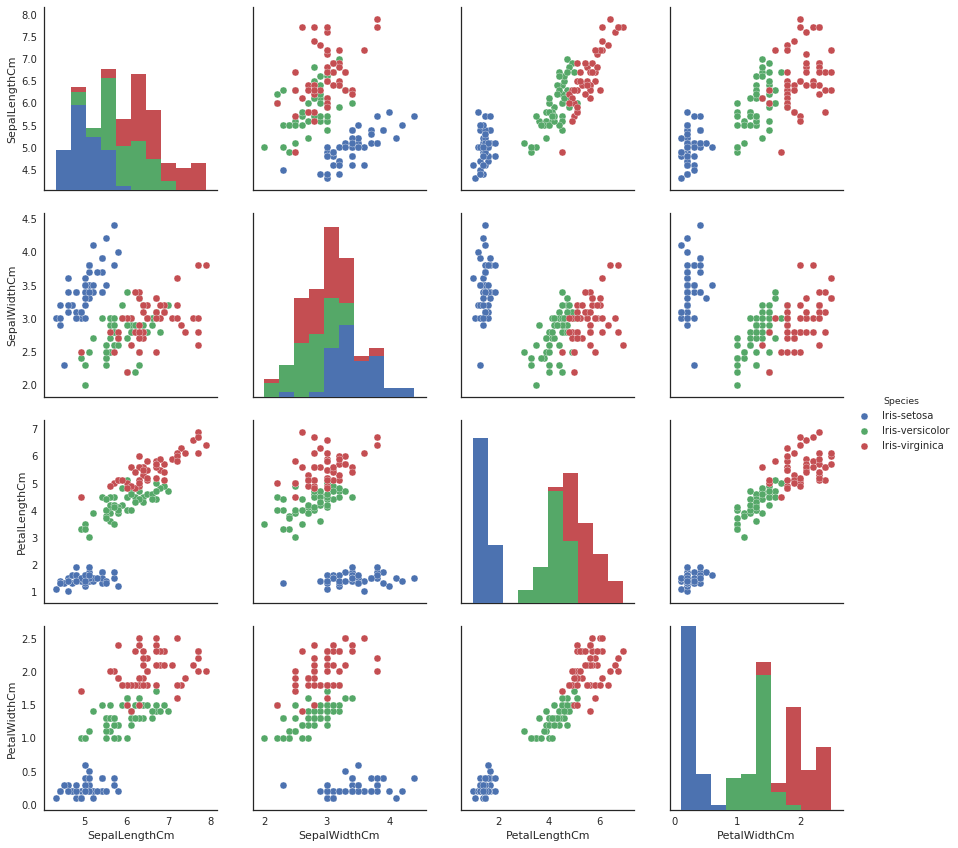

In [44]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dfc45fd30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0dfa4b0f98>]], dtype=object)

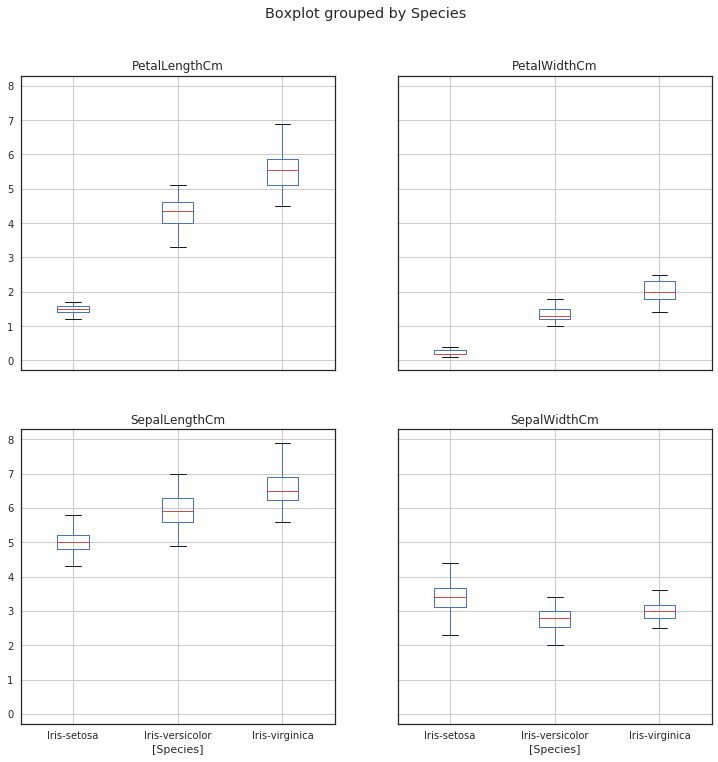

In [45]:
# Box plots can also be made using DataFrame
iris.drop("Id", axis=1).boxplot(by="Species",figsize=(12, 12))

## Machine Learning Algorithms and Decision Boundaries

Since our Species column which contains these three class labels contain categorical data, the first thing to do would be to encode them numerically as follows:

In [46]:
target_map = {'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2 }
# Use the pandas apply method to numerically encode our attrition target variable
iris['Species'] = iris['Species'].apply(lambda x: target_map[x])
iris

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
5      6            5.4           3.9            1.7           0.4        0
6      7            4.6           3.4            1.4           0.3        0
7      8            5.0           3.4            1.5           0.2        0
8      9            4.4           2.9            1.4           0.2        0
9     10            4.9           3.1            1.5           0.1        0
10    11            5.4           3.7            1.5           0.2        0
11    12            4.8           3.4            1.6           0.2        0
12    13            4.8           3.0            1.4           0.1        0
13    14            4.3           3.0            1.1           0.1        0
14    15            5.8           4.0            1.2           0.2        0
15    16            5.7           4.4            1.5           0.4        0
16    17            5.4           3.9            1.3           0.4        0
17    18            5.1           3.5            1.4           0.3        0
18    19            5.7           3.8            1.7           0.3        0
19    20            5.1           3.8            1.5           0.3        0
20    21            5.4           3.4            1.7           0.2        0
21    22            5.1           3.7            1.5           0.4        0
22    23            4.6           3.6            1.0           0.2        0
23    24            5.1           3.3            1.7           0.5        0
24    25            4.8           3.4            1.9           0.2        0
25    26            5.0           3.0            1.6           0.2        0
26    27            5.0           3.4            1.6           0.4        0
27    28            5.2           3.5            1.5           0.2        0
28    29            5.2           3.4            1.4           0.2        0
29    30            4.7           3.2            1.6           0.2        0
..   ...            ...           ...            ...           ...      ...
120  121            6.9           3.2            5.7           2.3        2
121  122            5.6           2.8            4.9           2.0        2
122  123            7.7           2.8            6.7           2.0        2
123  124            6.3           2.7            4.9           1.8        2
124  125            6.7           3.3            5.7           2.1        2
125  126            7.2           3.2            6.0           1.8        2
126  127            6.2           2.8            4.8           1.8        2
127  128            6.1           3.0            4.9           1.8        2
128  129            6.4           2.8            5.6           2.1        2
129  130            7.2           3.0            5.8           1.6        2
130  131            7.4           2.8            6.1           1.9        2
131  132            7.9           3.8            6.4           2.0        2
132  133            6.4           2.8            5.6           2.2        2
133  134            6.3           2.8            5.1           1.5        2
134  135            6.1           2.6            5.6           1.4        2
135  136            7.7           3.0            6.1           2.3        2
136  137            6.3           3.4            5.6           2.4        2
137  138            6.4           3.1            5.5           1.8        2
138  139            6.0           3.0            4.8           1.8        2
139  140            6.9           3.1            5.4           2.1        2
140  141            6.7           3.1            5.6  

In [47]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier # A combine model of many decision trees

### Correlation among features
When we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully

In [48]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = iris['Species']

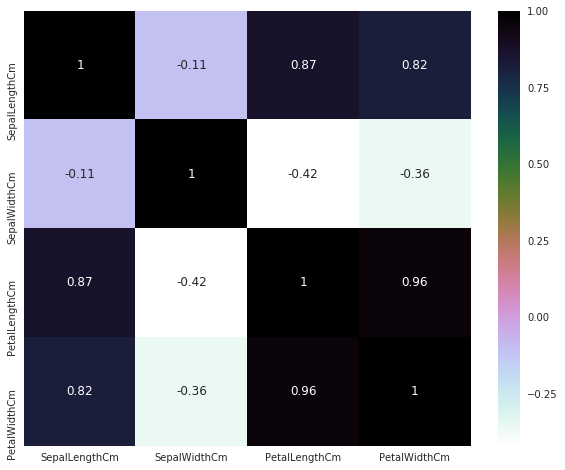

In [49]:
plt.figure(figsize=(10,8)) 
sns.heatmap(X.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

#### Observation
The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later


### Steps To Be followed When Applying an Algorithm

-    Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

-    Select any algorithm based on the problem (classification or regression) whatever you feel may be good.

-    Then pass the training dataset to the algorithm to train it.

-    Then pass the testing data to the trained algorithm to predict the outcome.

-    We then check the accuracy by passing the predicted outcome and the actual output to the model.

#### Splitting The Data into Training And Testing Dataset

In [50]:
train, test = train_test_split(iris, test_size = 0.3, random_state=1212)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [51]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y = train.Species# output of our training data
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y = test.Species   #output value of test data

In [52]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.977777777778


In [53]:
model = DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.955555555556


We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

In [54]:
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [55]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.688888888889
The accuracy of the Logistic Regression using Sepals is: 0.644444444444


In [56]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.955555555556
The accuracy of the Decision Tree using Sepals is: 0.644444444444


### Plotting Decision Surface

In [59]:
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

X = iris.iloc[:, :2]  # Take only the first two features.        
y = iris.Species
h = .02  # step size in the mesh
X = StandardScaler().fit_transform(X)

# Implement 3 Logistic Regression models with varying values of C
clf = LogisticRegression(C=0.01)
clf.fit(X, y)

clf2 = LogisticRegression(C=1)
clf2.fit(X, y)

clf3 = LogisticRegression(C=100)
clf3.fit(X, y)

# Define our usual decision surface bounding plots
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                     , np.arange(y_min, y_max, h))
y_ = np.arange(y_min, y_max, h)

In [60]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                  colorscale='Viridis',
                  showscale=True)

trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], 
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                    )
layout= go.Layout(
    autosize= True,
    title= 'Logistic Regression (C=0.01)',
    hovermode= 'closest',
    showlegend= False)
    
data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)       
py.iplot(fig)


Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Z = Z.reshape((xx.shape[0], xx.shape[1], 3))


trace3 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Viridis',
                    showscale=True)

trace4 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                   )

layout= go.Layout(
    autosize= True,
    title= 'Logistic Regression (C=1)',
    hovermode= 'closest',
    showlegend= False)

data = [trace3, trace4]
fig2 = go.Figure(data=data,layout= layout)   

for i in map(str, range(1, 3)):
    x = 'xaxis' + i
    y = 'yaxis' + i
    fig['layout'][x].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)
    fig['layout'][y].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)

py.iplot(fig2)

del X, y # remove the earlier X and y
X = iris.iloc[:, :2]  # Take only the first two features.        
y = iris.Species
h = .02  # step size in the mesh
X = StandardScaler().fit_transform(X)

Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


trace5 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Viridis',
                    showscale=True)

trace6 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                   )

layout= go.Layout(
    autosize= True,
    title= 'Logistic Regression (C=100)',
    hovermode= 'closest',
    showlegend= False)

data = [trace5, trace6]
fig3 = go.Figure(data=data,layout= layout)   

py.iplot(fig3)
